<a href="https://colab.research.google.com/github/vigneshwarjayabal/NLP/blob/main/NLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Natural Language Processing**

- Setup Spacy and Language Library
-Understant Basic NLP Topic

  - Tokenization
  - Stemming
  - Lemmatization
  - Stop Words
- Spacy for Vocabulary Matching

What is Spacy?

- Open Source NLP Library.
- Designed to effectively handle NLP tasks with the most efficient implementation of comman algorithms.
- **spaCy** (https://spacy.io/) is an open-source Python library that parses and "understands" large volumes of text. Separate models are available that cater to specific languages (English, French, German, etc.).
- For many NLP tasks,Spacy only has one implement method, choosing the most efficient algorithm currently avaible.

What is NLTK?

- NLTK - Natural Language Toolkit is a very popular open source.

- Initially released in 2001 , it is much older than Spacy(released 2015)

- It also provides many functionalities , but includes less efficient implementations.

NLTK vs Spacy

- For many comman NLP tasks, Spacy is much faster and more efficient , at the cost of the user not being able to choose algorithmic implementations.

- Spacy dones not iclude pre-created models for some application , such as sentiment analysis, which is typically easier to perform with NLTK.



What is NLP?
- natural Language Processing(NLP) is an area of computer science and artificail intellgence concerned with the interactions between computers and human(natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

- Natural Language Processing (NLP) is a subfield of Artificial Intelligence (AI) that focuses on the interaction between computers and human languages.

Goal of NLP:

The goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is meaningful and useful. It bridges the gap between human communication (natural language) and machine understanding.

Key Components of NLP

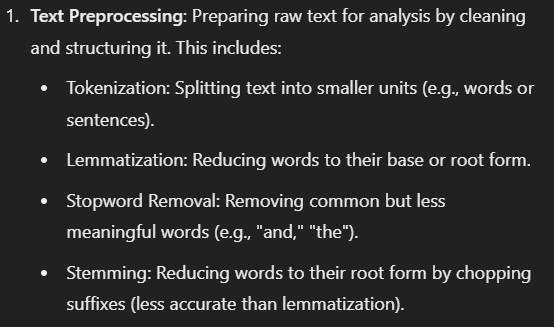

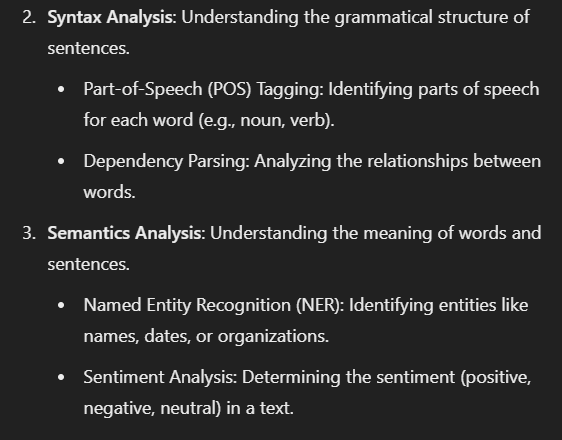

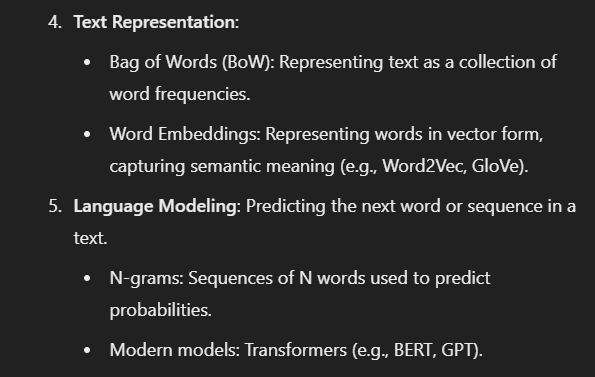

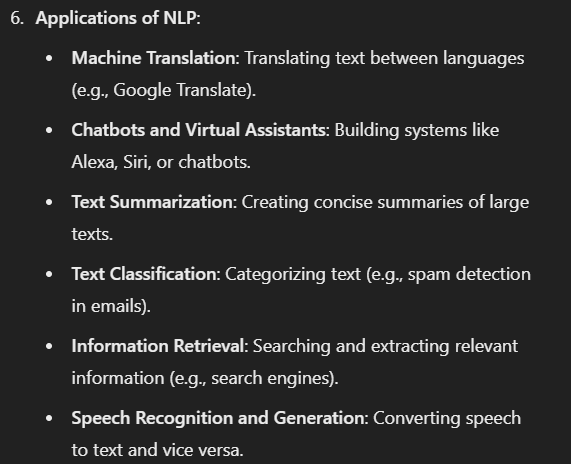

# **Spacy Setup and Overview**

Example Use Case:

- Classifying Emails as Spam vs Legitimate.
- Sentiment Analysis of Text Movie Reviews.
- Analyzing Trends from Written Customer Feedback forms.

- Understanding text commands,"Hey Google, Play this song".

# Installation and Setup

Installation is a two-step process. First, install spaCy using either conda or pip. Next, download the specific model you want, based on language.<br> For more info visit https://spacy.io/usage/

### 1. From the command line or terminal:
> `conda install -c conda-forge spacy`
> <br>*or*<br>
> `pip install -U spacy`

> ### Alternatively you can create a virtual environment:
> `conda create -n spacyenv python=3 spacy=2`

### 2. Next, also from the command line (you must run this as admin or use sudo):

> `python -m spacy download en`

> ### If successful, you should see a message like:

> **`Linking successful`**<br>
> `    C:\Anaconda3\envs\spacyenv\lib\site-packages\en_core_web_sm -->`<br>
> `    C:\Anaconda3\envs\spacyenv\lib\site-packages\spacy\data\en`<br>
> ` `<br>
> `    You can now load the model via spacy.load('en')`


In [5]:
!pip install spacy


In [6]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.7.1
    Uninstalling en-core-web-sm-3.7.1:
      Successfully uninstalled en-core-web-sm-3.7.1
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


There are few Key steps for working with Spacy:

- Loading the Lanquage Library
- Building a pipeline Object
- Using Tokens
- Parts-of-Speech Tagging
- Understanding Token Attributes.

The npl() function from spacy automatically takes raw text and performs a series of operation to tag,parse, and describe the text data.

In [7]:
import spacy
# Load the English language model
nlp = spacy.load("en_core_web_sm")

In [9]:
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

**Tokenization** - Segmenting text into words, punctuations marks etc.

**Part-of-speech (POS)** -  Tagging	Assigning word types to tokens, like verb or noun.

**Dependency Parsing** -	Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object.

In [10]:
for token in doc:
  print(token.text)

Tesla
is
looking
at
buying
U.S.
startup
for
$
6
million


In [11]:
for token in doc:
  print(token.text, token.pos)

Tesla 96
is 87
looking 100
at 85
buying 100
U.S. 96
startup 100
for 85
$ 99
6 93
million 93


In [12]:
for token in doc:
  print(token.text, token.pos_)

Tesla PROPN
is AUX
looking VERB
at ADP
buying VERB
U.S. PROPN
startup VERB
for ADP
$ SYM
6 NUM
million NUM


In [13]:
for token in doc:
  print(token.text, token.pos_ ,token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN dobj
startup VERB advcl
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


# Pipeline
When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.



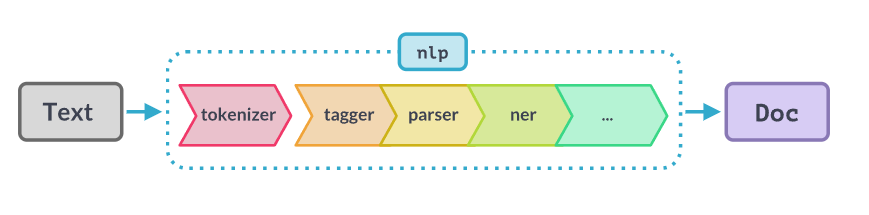

In [14]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7dc3e5352320>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7dc3e0b75840>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7dc3e5027c30>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7dc3e0afb880>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7dc3e0a0b0c0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7dc3e5026180>)]

In [15]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

## Tokenization
The first step in processing text is to split up all the component parts (words & punctuation) into "tokens". These tokens are annotated inside the Doc object to contain descriptive information.

In [16]:
doc2 = nlp(u"Tesla isn't looking into startups anymore.")

In [17]:
for token in doc2:
  print(token.text, token.pos_ ,token.dep_)

Tesla PROPN nsubj
is AUX aux
n't PART neg
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


In [18]:
doc3 = nlp(u"Tesla isn't    looking into startups anymore.")

In [20]:
for token in doc3:
  print(token.text, token.pos_ ,token.dep_)

Tesla PROPN nsubj
is AUX aux
n't PART neg
    SPACE dep
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


In [22]:
# we can also use indexing to actually grab tokens individually

doc3[0]

Tesla

In [23]:
type(doc3[0])

spacy.tokens.token.Token

## Part-of-Speech Tagging (POS)
The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.


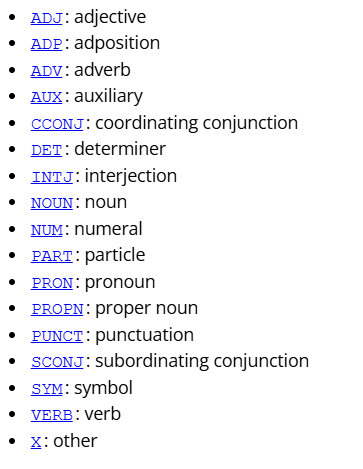

In [24]:
doc3[0].pos_

'PROPN'

In [25]:
type(doc3[0].pos_)

str

# dependency

In Natural Language Processing (NLP), dependency refers to the grammatical structure of a sentence, where words are connected based on their syntactic relationships. This structure is represented in the form of a dependency tree, where each word in a sentence is a node, and the edges represent the grammatical dependencies between words.

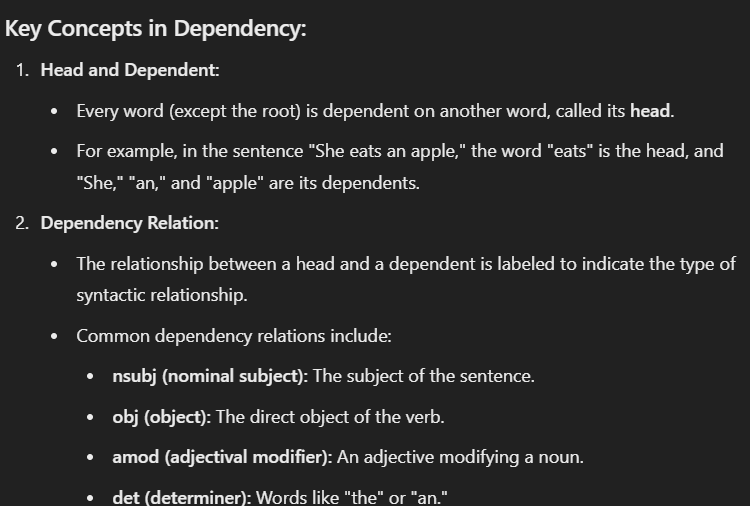

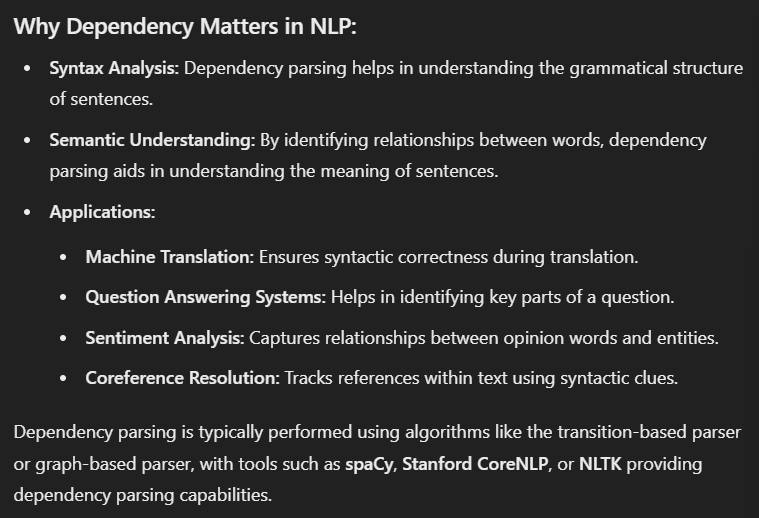

In [26]:
doc3[0].dep_

'nsubj'

In [27]:
spacy.explain('PROPN')

'proper noun'

In [28]:
spacy.explain('nsubj')

'nominal subject'

In [ ]:
#To see the full name of a tag use `spacy.explain(tag)`

#Additional Token Attributes
We'll see these again in upcoming lectures. For now we just want to illustrate some of the other information that spaCy assigns to tokens:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|